In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\U6056186\Downloads\placement (1).csv")

In [4]:
df.shape

(1000, 3)

In [5]:
df.sample(5)

,cgpa,placement_exam_marks,placed
270,6.80,16.0,1
242,5.99,44.0,0
364,6.87,9.0,1
593,6.55,62.0,0
691,7.32,14.0,0


C:\Users\U6056186\AppData\Local\Temp\ipykernel_14720\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\U6056186\AppData\Local\Temp\ipykernel_14720\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


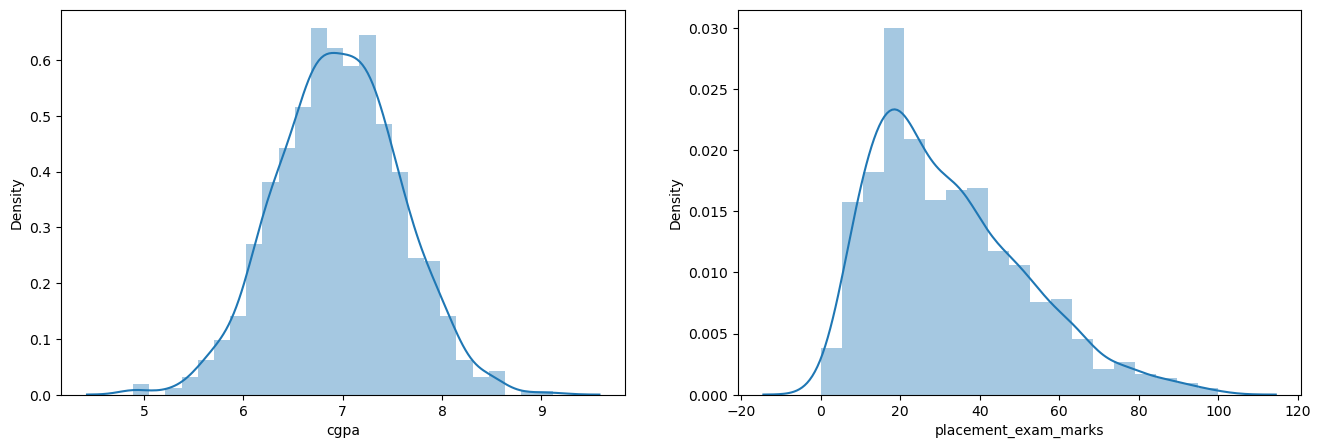

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [14]:
df['cgpa'].skew()

-0.014529938929314918

In [15]:
print('Mean of CGPA', df['cgpa'].mean())
print('SD of CGPA', df['cgpa'].std())
print('Min of CGPA', df['cgpa'].min())
print('Max of CGPA', df['cgpa'].max())

Mean of CGPA 6.96124
SD of CGPA 0.6158978751323894
Min of CGPA 4.89
Max of CGPA 9.12


In [17]:
print('Highest Allowed values of CGPA', df['cgpa'].mean()+3*df['cgpa'].std())
print('Lowest Allowed values of CGPA', df['cgpa'].mean()-3*df['cgpa'].std())

Highest Allowed values of CGPA 8.808933625397168
Lowest Allowed values of CGPA 5.113546374602832


In [32]:
df[(df['cgpa']>df['cgpa'].mean()+3*df['cgpa'].std()) |
   (df['cgpa']<df['cgpa'].mean()-3*df['cgpa'].std())].index
   

Int64Index([485, 995, 996, 997, 999], dtype='int64')

# # Approach 1

# Trimming The dataset

In [33]:
trim_df=df.drop(df[(df['cgpa']>df['cgpa'].mean()+3*df['cgpa'].std()) |
   (df['cgpa']<df['cgpa'].mean()-3*df['cgpa'].std())].index)

In [34]:
trim_df.iloc[485]

cgpa                     7.67
placement_exam_marks    65.00
placed                   1.00
Name: 486, dtype: float64

In [37]:
trim_df.shape

(995, 3)

# Approach 2

# Calculating the Zscore

In [39]:
df['Z-Score'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [40]:
df.head()

,cgpa,placement_exam_marks,placed,Z-Score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [49]:
df[(df['Z-Score']>3) | (df['Z-Score']<-3)]

,cgpa,placement_exam_marks,placed,Z-Score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [50]:
Z_df = df.drop(df[(df['Z-Score']>3) | (df['Z-Score']<-3)].index)

In [51]:
Z_df.shape

(995, 4)

# Capping

In [66]:
upperlimit= df['cgpa'].mean()+3*df['cgpa'].std()
upperlimit

8.808933625397168

In [67]:
lowerlimit=df['cgpa'].mean()-3*df['cgpa'].std()
lowerlimit

5.113546374602832

In [60]:
df['capped']=np.where(df['cgpa']>upperlimit,upperlimit,
         np.where(df['cgpa']<lowerlimit,lowerlimit,df['cgpa']))

In [64]:
df[df['capped']<lowerlimit]

,cgpa,placement_exam_marks,placed,Z-Score,capped


In [65]:
df.describe()

,cgpa,placement_exam_marks,placed,Z-Score,capped
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,6.961240,32.225000,0.489000,-1.474376e-16,6.961499
std,0.615898,19.130822,0.500129,1.000000e+00,0.612688
min,4.890000,0.000000,0.000000,-3.362960e+00,5.113546
25%,6.550000,17.000000,0.000000,-6.677081e-01,6.550000
50%,6.960000,28.000000,0.000000,-2.013321e-03,6.960000
75%,7.370000,44.000000,1.000000,6.636815e-01,7.370000
max,9.120000,100.000000,1.000000,3.505062e+00,8.808934


# Day 43: Removal using the IQR Method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\U6056186\Downloads\placement (2).csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\U6056186\AppData\Local\Temp\ipykernel_22360\2535591610.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

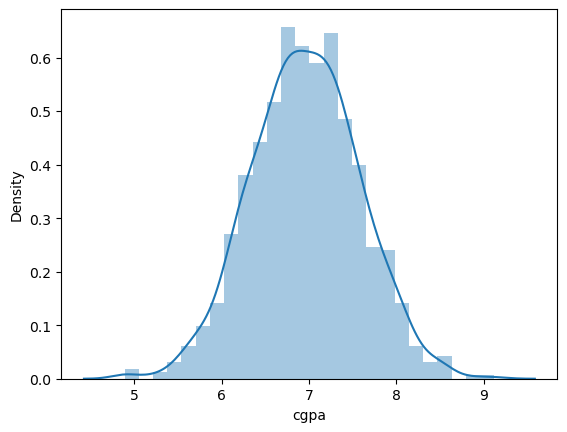

In [5]:
sns.distplot(df['cgpa'])

C:\Users\U6056186\AppData\Local\Temp\ipykernel_22360\2541405458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

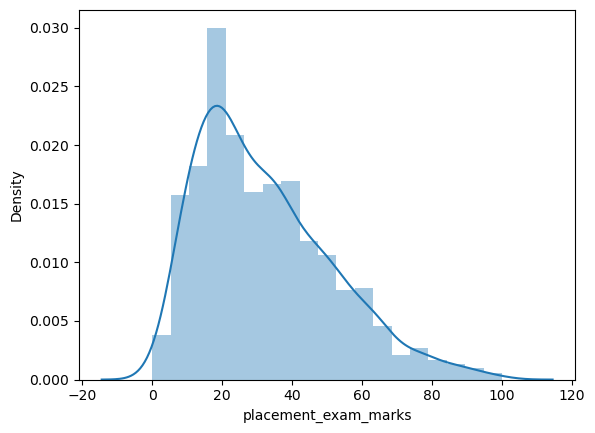

In [6]:
sns.distplot(df['placement_exam_marks'])

In [8]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<Axes: xlabel='placement_exam_marks'>

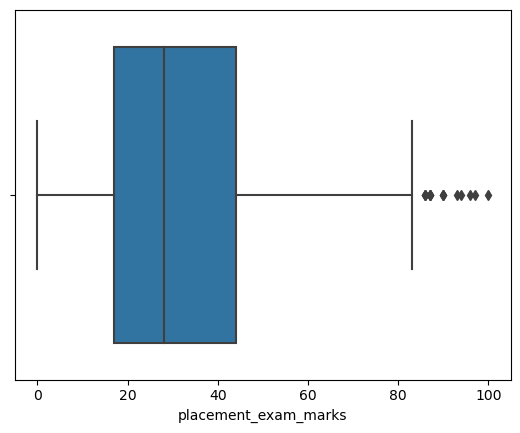

In [11]:
sns.boxplot(x=df['placement_exam_marks'])

# Find IQR

In [12]:
q25 = df['placement_exam_marks'].quantile(0.25)
q75 = df['placement_exam_marks'].quantile(0.75)

In [13]:
q25,q75

(17.0, 44.0)

In [14]:
iqr  = q75-q25

In [15]:
iqr

27.0

In [19]:
up_lm = q75 + 1.5 *iqr
low_lm = q25-1.5*iqr

In [20]:
up_lm,low_lm

(84.5, -23.5)

# Finding Outliers

In [34]:
df[((df['placement_exam_marks']>up_lm) | (df['placement_exam_marks']<low_lm))]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [35]:
len(df[((df['placement_exam_marks']>up_lm) | (df['placement_exam_marks']<low_lm))])

15

# Trimming

In [ ]:
trim_df = 

In [37]:
trim_df =  df.drop(df[((df['placement_exam_marks']>up_lm) | (df['placement_exam_marks']<low_lm))].index)

In [38]:
trim_df.shape

(985, 3)

In [39]:
df.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks'>

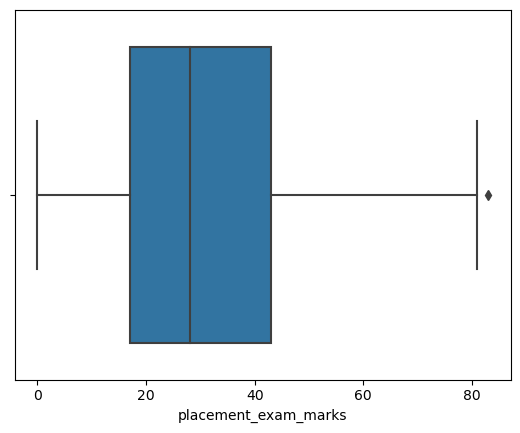

In [51]:
sns.boxplot(x=trim_df['placement_exam_marks'])

In [46]:
trim_df[trim_df['placement_exam_marks']>up_lm-2]

,cgpa,placement_exam_marks,placed
403,6.71,83.0,0


# Capping IQR

In [22]:
new_df = df.copy()
new_df['Cap marks'] = np.where(df['placement_exam_marks']<low_lm,
         low_lm,np.where(df['placement_exam_marks']>up_lm,up_lm,
                         df['placement_exam_marks']))

In [23]:
new_df.head()

,cgpa,placement_exam_marks,placed,Cap marks
0,7.19,26.0,1,26.0
1,7.46,38.0,1,38.0
2,7.54,40.0,1,40.0
3,6.42,8.0,1,8.0
4,7.23,17.0,0,17.0


C:\Users\U6056186\AppData\Local\Temp\ipykernel_22360\3377860905.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Cap marks'])


<Axes: xlabel='Cap marks', ylabel='Density'>

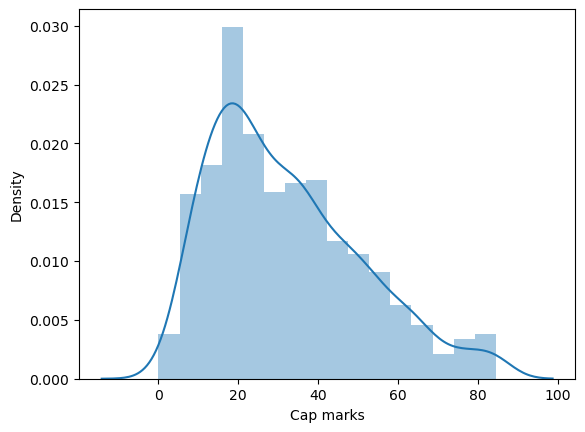

In [24]:
sns.distplot(new_df['Cap marks'])

<Axes: xlabel='Cap marks'>

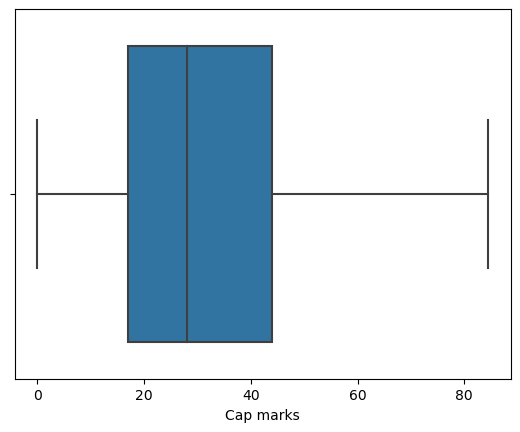

In [26]:
sns.boxplot(x=new_df['Cap marks'])

# Comparing Capping


C:\Users\U6056186\AppData\Local\Temp\ipykernel_22360\479053224.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\U6056186\AppData\Local\Temp\ipykernel_22360\479053224.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Cap marks'])


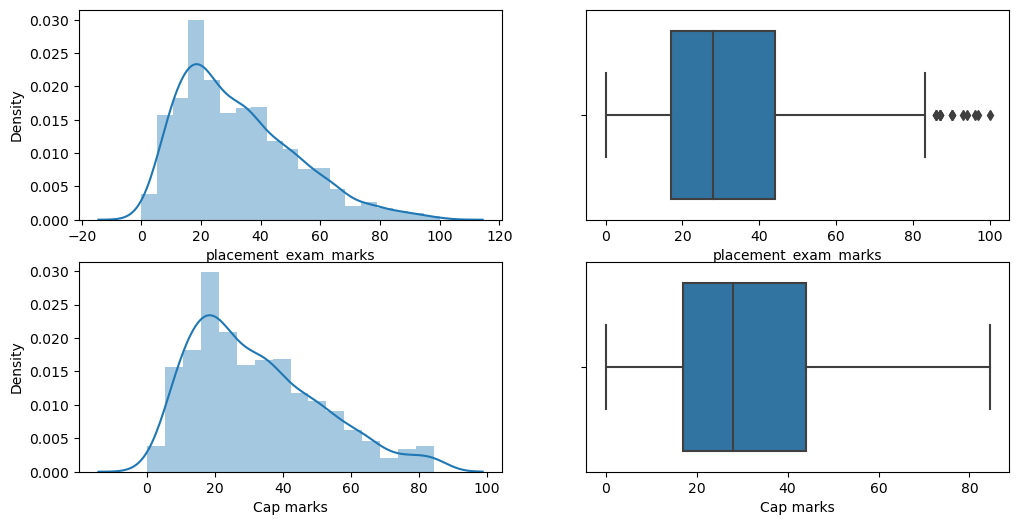

In [55]:
plt.figure(figsize=(12,6))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])
plt.subplot(222)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(223)
sns.distplot(new_df['Cap marks'])
plt.subplot(224)
sns.boxplot(x=new_df['Cap marks'])
plt.show()